# 연구과제(Seaborn 기본 그래프)

다음 데이터는 2022년 5월 1일부터 2023년 5월 31일까지 서울과 전국의 Covid19 확진자 현황을 기록한 데이터이다.

| 날짜         | 서울시 누적 확진자 | 서울시 일일 확진 | 서울시 치료중 | 서울시 퇴원 | 서울시 추가 퇴원 | 서울시 누적 사망 | 서울시 일일 사망 | 전국 누적 확진 | 전국 일일 확진 | 전국 치료중 | 전국 퇴원 | 전국 당일 사망 | 전국 누적 사망 |
|------------|------------|-----------|---------|--------|-----------|-----------|-----------|----------|----------|--------|-------|----------|----------|
| 2023-05-31 | 6204277    | 5987      | 0       |        |           | 6492      | 6         | 31703511 | 24411    | 0      |       | 17       | 34784    |
| 2023-05-30 | 6198290    | 3326      | 0       |        |           | 6486      | 1         | 31679100 | 13529    | 0      |       | 7        | 34767    |
| 2023-05-29 | 6194964    | 1393      | 0       |        |           | 6485      | 1         | 31665571 | 6868     | 0      |       | 3        | 34760    |
| 2023-05-28 | 6194964    | 1393      | 0       |        |           | 6485      | 1         | 31665571 | 6868     | 0      |       | 3        | 34760    |
| 2023-05-27 | 6191196    | 4078      | 0       |        |           | 6485      | 0         | 31647238 | 17796    | 0      |       | 3        | 34784    |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/pydata/covid19_full.xlsx

> 출처: 서울시청 홈페이지

### 그래프 요구사항

아래의 내용을 모두 반영한 그래프를 생성하세요.

1. 사용자로부터 날짜를 `yyyymmdd`의 8자리 문자열로 입력받은 후 그 날짜를 시작으로 1주일간의 데이터를 추출하시오.
2. 2행 1열의 서브플롯을 만들고 각각의 그래프 영역에 대한 twinx를 생성하시오.
3. 첫 번째 영역에는 서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.
4. 두 번째 영역에는 전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.
5. 누적 확진자는 y축을 왼쪽으로 설정한 막대 그래프로 표시하고 일일 확진자는 y축을 오른쪽으로 설정한 시계열 그래프로 생성해야 합니다.
6. seaborn을 활용하여 구현하세요.

아래의 예시와 최대한 비슷하게 구현하면 됩니다.

![exam2](res/exam1.png)

이 그래프는 질병관리청(https://ncov.kdca.go.kr/bdBoardList_Real.do)의 코로나19 데시보드에서 제시하는 형태를 재현한 것 입니다.



In [2]:
import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, melt, date_range, to_datetime, DateOffset

In [3]:
plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.size"] =12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
origin = read_excel("https://data.hossam.kr/pydata/covid19_full.xlsx", index_col="날짜")
origin

,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
날짜,,,,,,,,,,,,,
2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-09,10,0.0,10,0.0,0.0,0,NaN,27.0,0.0,24,3.0,NaN,0
2020-02-08,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
2020-02-07,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0


In [5]:
date=to_datetime(input("날짜를입력하세요(yyyymmdd)."))
date1=date_range(date, date + DateOffset(days=6), freq="D")
date1

DatetimeIndex(['2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03',
               '2021-04-04', '2021-04-05', '2021-04-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
origin.index = to_datetime(origin.index)

In [7]:
filtered_df = origin[origin.index.isin(date1)]
filtered_df

,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
날짜,,,,,,,,,,,,,
2021-04-06,32999,147.0,2267,30303.0,131.0,429,NaN,106230.0,478.0,7115,97363.0,NaN,1752
2021-04-05,32852,152.0,2251,30172.0,71.0,429,NaN,105752.0,473.0,7104,96900.0,NaN,1748
2021-04-04,32700,149.0,2170,30101.0,125.0,429,NaN,105279.0,543.0,6946,96589.0,NaN,1744
2021-04-03,32551,155.0,2148,29976.0,78.0,427,NaN,104736.0,543.0,6800,96196.0,NaN,1740
2021-04-02,32397,167.0,2073,29898.0,116.0,426,NaN,104194.0,558.0,6596,95861.0,NaN,1737
2021-04-01,32233,199.0,2026,29782.0,88.0,425,NaN,103639.0,551.0,6465,95439.0,NaN,1735
2021-03-31,32034,158.0,1916,29694.0,136.0,424,NaN,103088.0,506.0,6327,95030.0,NaN,1731


>서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료
- 누적 확진자는 y축을 왼쪽으로 설정한 막대 그래프로 표시하고 일일 확진자는 y축을 오른쪽으로 설정한 시계열 그래프로 생성

In [8]:
df1 = filtered_df.filter(['날짜','서울시 누적 확진자', '서울시 일일 확진'])
df1 = df1.sort_index(ascending = True)
df1

,서울시 누적 확진자,서울시 일일 확진
날짜,,
2021-03-31,32034,158.0
2021-04-01,32233,199.0
2021-04-02,32397,167.0
2021-04-03,32551,155.0
2021-04-04,32700,149.0
2021-04-05,32852,152.0
2021-04-06,32999,147.0


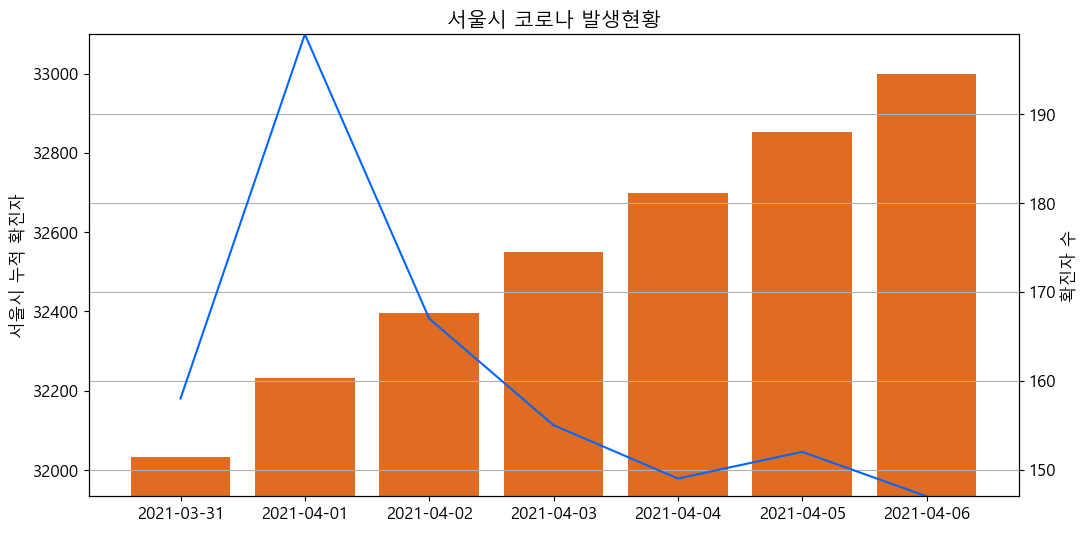

In [12]:
fig, ax1 = plt.subplots(1, 1)
# fig, ax2 = plt.subplots(1,1)   독립된 서브플롯
ax2 = ax1.twinx()


# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.barplot(data=df1, x=list(range(len(df1))), y='서울시 누적 확진자', color='#ff6600', ax=ax1)
sb.lineplot(data=df1, x=list(range(len(df1))), y='서울시 일일 확진', color='#0066ff', ax=ax2)
plt.title('서울시 코로나 발생현황')   # 그래프 제목
# plt.xlabel("날짜")      # x축 제목

plt.xticks(list(range(len(df1))),  df1.index.strftime("%Y-%m-%d"))
# ax1.set_xticklabels(list(range(len(df1))),df1.index, fontsize=6, color='#ff0000')
plt.ylabel("확진자 수")   # y축 제목
ax1.set_ylim([df1['서울시 누적 확진자'].min()-100,df1['서울시 누적 확진자'].max()+100])
ax2.set_ylim([df1['서울시 일일 확진'].min(),df1['서울시 일일 확진'].max()])
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

# x = list(range(len(df1)))
# -> 좌표 설정
# -> 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.


# plt.xticklabels()
# # y축 범위


>전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료
- 누적 확진자는 y축을 왼쪽으로 설정한 막대 그래프로 표시하고 일일 확진자는 y축을 오른쪽으로 설정한 시계열 그래프로 생성

In [13]:
df2 = filtered_df.filter(['날짜','전국 누적 확진', '전국 일일 확진'])
df2 = df2.sort_index(ascending = True)
df2


,전국 누적 확진,전국 일일 확진
날짜,,
2021-03-31,103088.0,506.0
2021-04-01,103639.0,551.0
2021-04-02,104194.0,558.0
2021-04-03,104736.0,543.0
2021-04-04,105279.0,543.0
2021-04-05,105752.0,473.0
2021-04-06,106230.0,478.0


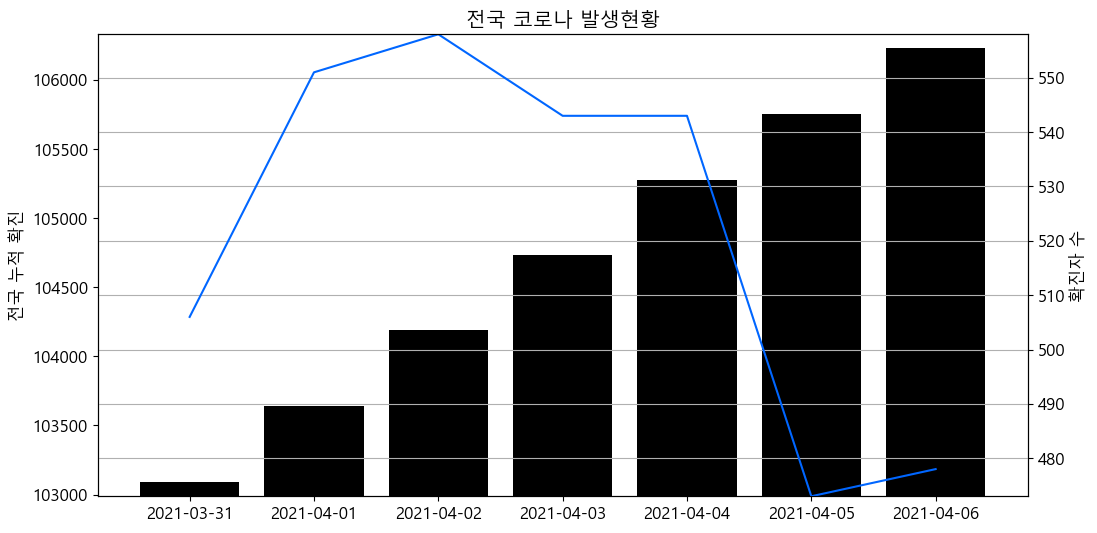

In [15]:
fig, ax1 = plt.subplots(1, 1)
# fig, ax2 = plt.subplots(1,1)   독립된 서브플롯
ax2 = ax1.twinx()


# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)

sb.barplot(data=df2, x=list(range(len(df2))), y='전국 누적 확진', color='#000000', ax=ax1)
sb.lineplot(data=df2, x=list(range(len(df2))), y='전국 일일 확진', color='#0066ff', ax=ax2)
plt.title('전국 코로나 발생현황')   # 그래프 제목
# plt.xlabel("날짜")      # x축 제목

plt.xticks(list(range(len(df2))),  df1.index.strftime("%Y-%m-%d"))
# ax1.set_xticklabels(list(range(len(df1))),df1.index, fontsize=6, color='#ff0000')
plt.ylabel("확진자 수")   # y축 제목
ax1.set_ylim([df2['전국 누적 확진'].min()-100,df2['전국 누적 확진'].max()+100])
ax2.set_ylim([df2['전국 일일 확진'].min(),df2['전국 일일 확진'].max()])
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_716\510598126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot( x=list(range(len(df1))), y=df1['서울시 누적 확진자'], palette="pastel", ax=ax1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_716\510598126.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot( x=list(range(len(df2))), y=df2['전국 누적 확진'],palette="pastel", ax=ax3)


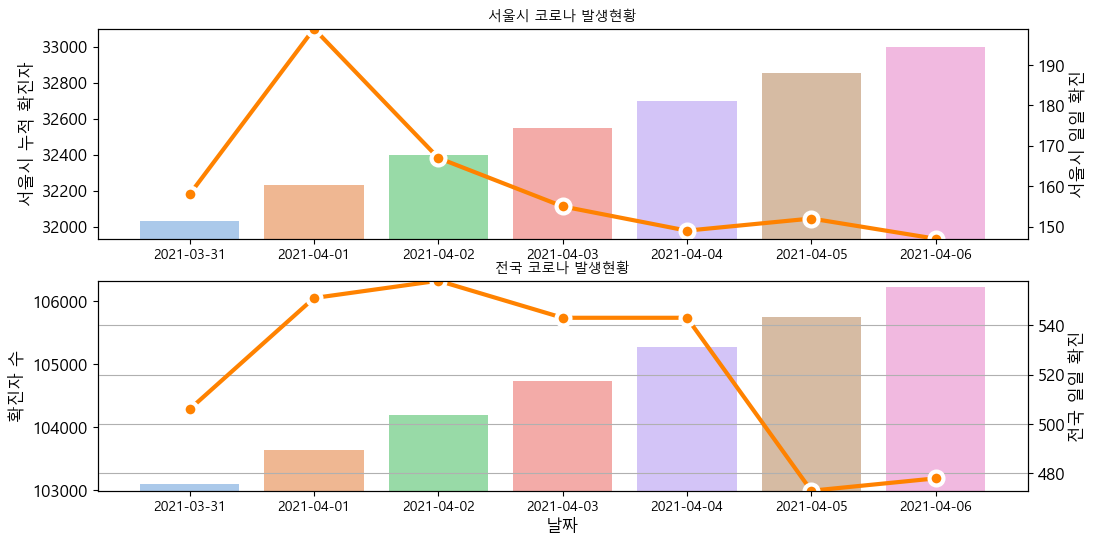

In [22]:

fig, (ax1, ax3) = plt.subplots(2, 1)
ax2 = ax1.twinx()
ax4 = ax3.twinx()

# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.barplot( x=list(range(len(df1))), y=df1['서울시 누적 확진자'], palette="pastel", ax=ax1)
sb.lineplot(x=list(range(len(df1))), y=df1['서울시 일일 확진'], color="#FF8200", linestyle='-', linewidth=3, ax=ax2,
            marker="o", markersize=10, markerfacecolor="#FF8200", markeredgecolor="#ffffff", markeredgewidth=3)
ax1.title.set_text("서울시 코로나 발생현황")
ax1.title.set_fontsize(10)
ax1.title.set_color('#000000') # 그래프 제목
# plt.xlabel("날짜")      # x축 제목
# x축의 좌표만 지정함 (막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax1.set_xticks(list(range(0, len(df1.index))))
# 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.

ax1.set_xticklabels(list(df1.index.strftime("%Y-%m-%d")), fontsize=10, color='#000000')
# ax1.set_xticklabels(list(range(len(df1))),df1.index, fontsize=6, color='#ff0000')
# ax1.set(xlabel='날짜', ylabel='확진자 수')

# plt.ylabel("확진자 수")   # y축 제목
ax1.set_ylim([df1['서울시 누적 확진자'].min()-100,df1['서울시 누적 확진자'].max()+100])
ax2.set_ylim([df1['서울시 일일 확진'].min(),df1['서울시 일일 확진'].max()])

# fig, ax2 = plt.subplots(1,1)   독립된 서브플롯


# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)

sb.barplot( x=list(range(len(df2))), y=df2['전국 누적 확진'],palette="pastel", ax=ax3)
sb.lineplot(x=list(range(len(df2))), y=df2['전국 일일 확진'], color="#FF8200", linestyle='-', linewidth=3, ax=ax4,
            marker="o", markersize=10, markerfacecolor="#FF8200",markeredgecolor="#ffffff", markeredgewidth=3)

ax3.title.set_text("전국 코로나 발생현황")
ax3.title.set_fontsize(10)
ax3.title.set_color('#000000')

ax3.set(xlabel='날짜', ylabel='확진자 수')
# plt.xlabel("날짜")      # x축 제목
# x축의 좌표만 지정함 (막대그래프의 경우 x축 좌표는 무조건 0부터 시작함)
ax3.set_xticks(list(range(0, len(df2.index))))
# 지정된 x축 좌표에 표시될 텍스트 리스트를 지정함.
ax3.set_xticklabels(df2.index.strftime("%Y-%m-%d"), fontsize=10, color='#000000')
# ax1.set_xticklabels(list(range(len(df1))),df1.index, fontsize=6, color='#ff0000')
# plt.ylabel("확진자 수")   # y축 제목
ax3.set_ylim([df2['전국 누적 확진'].min()-100,df2['전국 누적 확진'].max()+100])
ax4.set_ylim([df2['전국 일일 확진'].min(),df2['전국 일일 확진'].max()])

plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

In [ ]:
(list(range(len(df1))), list(df1.index.strftime("%Y-%m-%d")))

([0, 1, 2, 3, 4, 5, 6],
 ['2020-03-10',
  '2020-03-11',
  '2020-03-12',
  '2020-03-13',
  '2020-03-14',
  '2020-03-15',
  '2020-03-16'])